# Average and deviation std of the models for the MSE (mean square error)

In [3]:
import os
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Compute MSE
def CMatrixMSELoss(target_matrix, predicted_matrix):
    mag_diff_sq = np.abs(predicted_matrix - target_matrix)**2
    loss = np.sum(mag_diff_sq) / np.size(target_matrix)
    return loss

In [11]:
# Extract targets and preditions from the simulation directory folder
def extract_targets_preditions_1sim(directory):
    target_tuples = []
    predit_tuples = []
    # Loop through each file in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)       # Construct the full file path
        if os.path.isfile(file_path):                       # Check if it is a file
            result_sim = np.load(file_path, allow_pickle=True)
            target_tuples.extend([(label, array) for label, array in result_sim if 'target' in label])
            predit_tuples.extend([(label, array) for label, array in result_sim if 'prediction' in label])
    return target_tuples, predit_tuples

In [6]:
# Derive the MSE for all one entire simulation
def remove_until_underscore(s):     # from the end until the first '_'
    parts = s.split('_')
    result = '_'.join(parts[1:])
    return result

def derive_MSE_1sim(target_tuples, predit_tuples):
    loss = []
    for i in range(len(target_tuples)):
        if remove_until_underscore(target_tuples[i][0]) == remove_until_underscore(predit_tuples[i][0]):
            loss.extend([CMatrixMSELoss(target_tuples[i][1], predit_tuples[i][1])])
        else:
            print("Capo abbiamo un problema :(")
    labels = [t[0] for t in predit_tuples]
    loss_pd = pd.DataFrame({'label': labels, 'value': loss})
    return loss_pd

In [7]:
# Take best result MINIMUM value repetition
def models_repmin_mean_devstd(df, name_models):
    # Extracting the base label (e.g., 'LabelA', 'LabelB')
    df['label_no_rep'] = df['label'].apply(lambda x: x.split('_rep')[0])
    # Group with the base label and find min
    min_lastLoss_s = df.groupby('label_no_rep')['value'].min()

    mean_models= []
    std_dev_models =[]
    for name in name_models:
        # model_s take the all 1000 sim same model with the best repetition value
        model_s = min_lastLoss_s[min_lastLoss_s.index.str.contains(name)]
        mean_models.append(model_s.mean())
        std_dev_models.append(model_s.std())
    return mean_models, std_dev_models

# SAVE everything
[(simulation hyp, name model, average, deviation std)]

In [12]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']

ave_devstd_run = []

for filename in os.listdir(directory_run):
    directory_path = os.path.join(directory_run, filename)       # Construct the full file path
    if not os.path.isfile(directory_path):
        target_tuples, predit_tuples = extract_targets_preditions_1sim(directory_path)
        mse_pd = derive_MSE_1sim(target_tuples, predit_tuples)
        mean_models, std_dev_models = models_repmin_mean_devstd(mse_pd, name_models)
        last_folder_name = os.path.basename(directory_path)
        for name, mean, std_dev in zip(name_models, mean_models, std_dev_models):
            new_data = [(last_folder_name, name, mean, std_dev)]
            ave_devstd_run.extend(new_data)

dt = np.dtype([
    ('simulation', 'U100'),
    ('model', 'U100'),
    ('average', 'f4'),
    ('std_dev', 'f4')
])
ave_devstd_run_nparray = np.array(ave_devstd_run, dtype=dt)
np.save(directory_run+'/20240525_run_ave_dev_save.npy', ave_devstd_run_nparray)

# Grapth

In [13]:
# Extrat the iloss and imb from the simulation label
def extract_values(label):
    match = re.search(r'iloss([0-9\.]+)_imb([0-9\.]+)', label)
    if match:
        return float(match.group(1)), float(match.group(2))
    return None, None

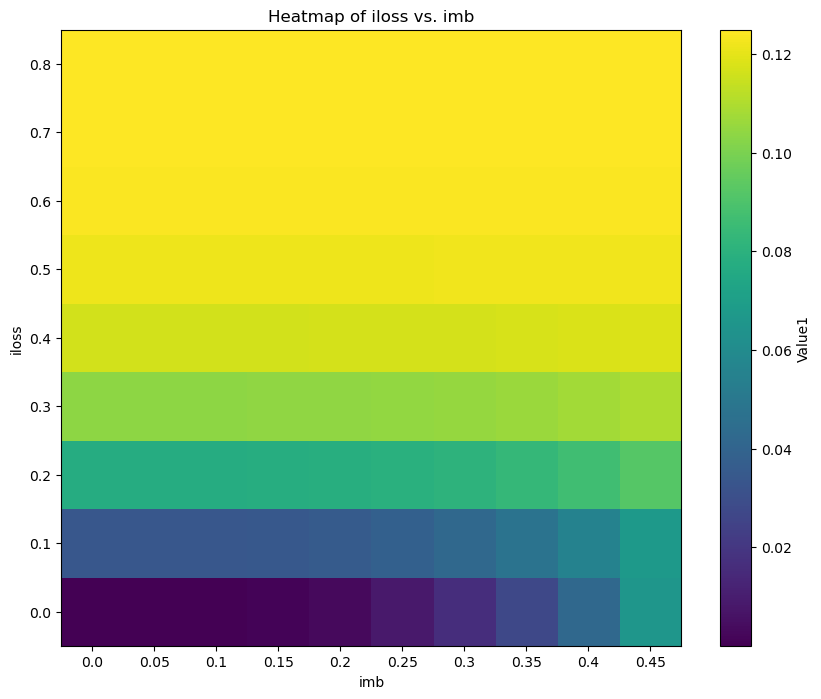

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,1.192755e-08,0.000012,0.000201,0.001025,0.003390,0.008420,0.016313,0.027127,0.042068,0.065711
0.1,3.401390e-02,0.034020,0.034113,0.034526,0.035690,0.038187,0.042218,0.047744,0.055249,0.067054
0.2,7.740549e-02,0.077408,0.077447,0.077619,0.078120,0.079196,0.080970,0.083450,0.086834,0.092147
0.3,1.039288e-01,0.103930,0.103943,0.104007,0.104198,0.104602,0.105269,0.106222,0.107523,0.109593
0.4,1.166066e-01,0.116607,0.116612,0.116635,0.116700,0.116831,0.117049,0.117362,0.117803,0.118516
0.5,1.219212e-01,0.121921,0.121923,0.121931,0.121950,0.121989,0.122050,0.122142,0.122274,0.122495
0.6,1.239798e-01,0.123980,0.123981,0.123983,0.123988,0.123998,0.124013,0.124036,0.124072,0.124134
0.7,1.247199e-01,0.124720,0.124720,0.124721,0.124722,0.124724,0.124727,0.124732,0.124740,0.124755
0.8,1.249491e-01,0.124949,0.124949,0.124949,0.124949,0.124950,0.124950,0.124951,0.124952,0.124955


In [14]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'Clements_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data


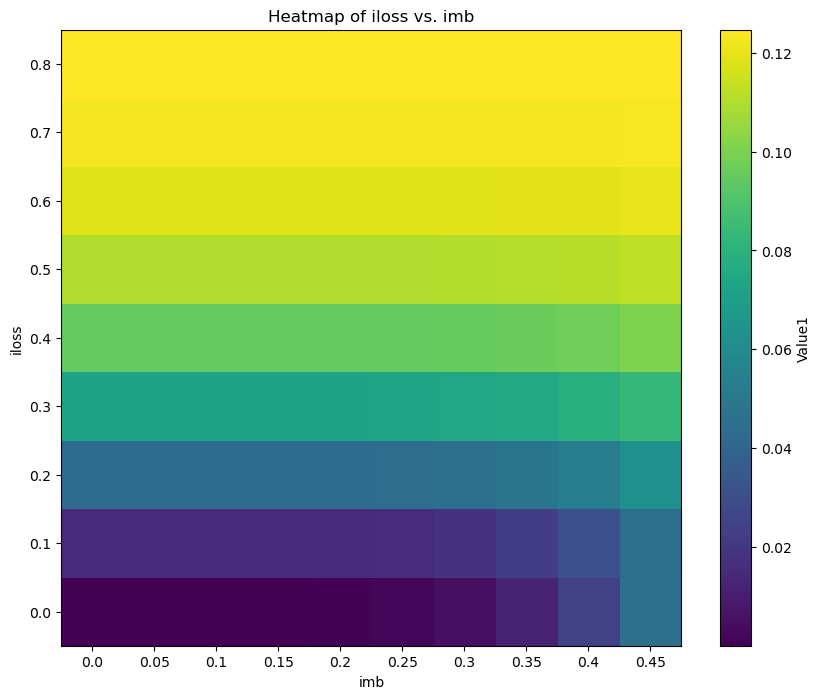

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.000004,0.000008,0.000037,0.000143,0.000543,0.001900,0.005076,0.011900,0.024187,0.045874
0.1,0.014786,0.014789,0.014808,0.014877,0.015140,0.016031,0.018114,0.022591,0.030653,0.044880
0.2,0.043573,0.043575,0.043587,0.043630,0.043794,0.044350,0.045651,0.048446,0.053479,0.062361
0.3,0.072182,0.072183,0.072190,0.072215,0.072311,0.072637,0.073400,0.075038,0.077988,0.083195
0.4,0.094700,0.094701,0.094704,0.094718,0.094770,0.094946,0.095357,0.096242,0.097834,0.100645
0.5,0.109864,0.109864,0.109866,0.109872,0.109897,0.109982,0.110180,0.110607,0.111375,0.112730
0.6,0.118682,0.118682,0.118683,0.118686,0.118696,0.118731,0.118812,0.118987,0.119301,0.119856
0.7,0.122983,0.122983,0.122983,0.122984,0.122988,0.122999,0.123024,0.123080,0.123179,0.123355
0.8,0.124600,0.124600,0.124600,0.124601,0.124601,0.124603,0.124609,0.124619,0.124639,0.124674


In [32]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'ClementsBell_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

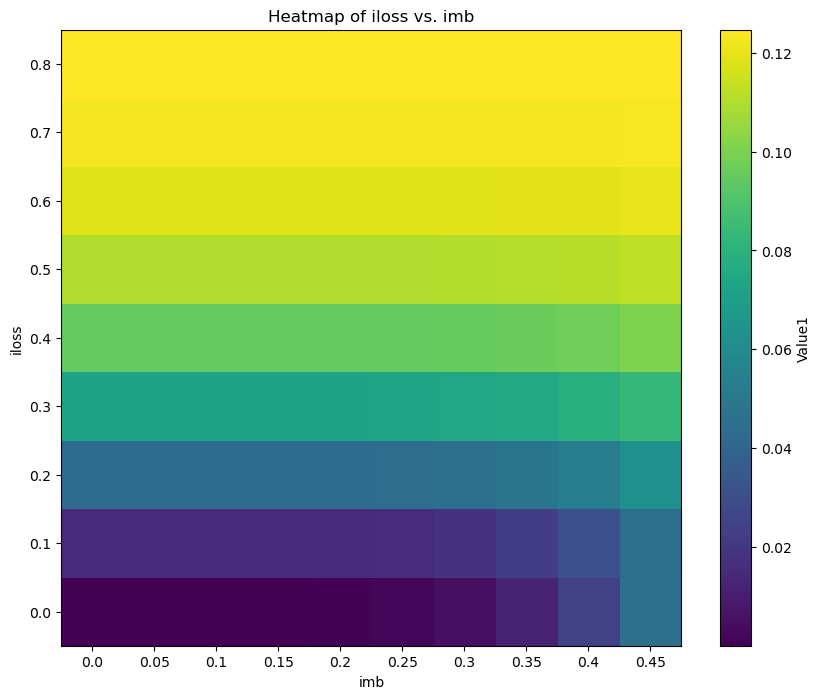

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.000004,0.000008,0.000037,0.000143,0.000543,0.001900,0.005076,0.011900,0.024187,0.045874
0.1,0.014786,0.014789,0.014808,0.014877,0.015140,0.016031,0.018114,0.022591,0.030653,0.044880
0.2,0.043573,0.043575,0.043587,0.043630,0.043794,0.044350,0.045651,0.048446,0.053479,0.062361
0.3,0.072182,0.072183,0.072190,0.072215,0.072311,0.072637,0.073400,0.075038,0.077988,0.083195
0.4,0.094700,0.094701,0.094704,0.094718,0.094770,0.094946,0.095357,0.096242,0.097834,0.100645
0.5,0.109864,0.109864,0.109866,0.109872,0.109897,0.109982,0.110180,0.110607,0.111375,0.112730
0.6,0.118682,0.118682,0.118683,0.118686,0.118696,0.118731,0.118812,0.118987,0.119301,0.119856
0.7,0.122983,0.122983,0.122983,0.122984,0.122988,0.122999,0.123024,0.123080,0.123179,0.123355
0.8,0.124600,0.124600,0.124600,0.124601,0.124601,0.124603,0.124609,0.124619,0.124639,0.124674


In [33]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'Fldzhyan_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

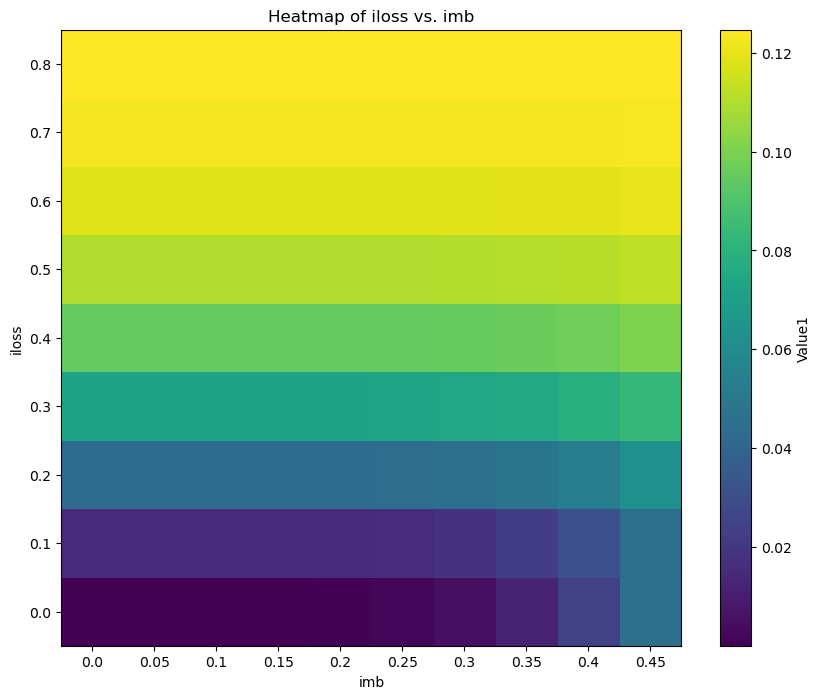

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.000003,0.000011,0.000029,0.000129,0.000565,0.001840,0.005164,0.011981,0.024080,0.045882
0.1,0.014785,0.014791,0.014802,0.014868,0.015153,0.015991,0.018171,0.022644,0.030582,0.044887
0.2,0.043573,0.043576,0.043583,0.043624,0.043802,0.044325,0.045686,0.048479,0.053435,0.062365
0.3,0.072182,0.072184,0.072188,0.072212,0.072316,0.072623,0.073421,0.075058,0.077963,0.083197
0.4,0.094700,0.094701,0.094703,0.094716,0.094772,0.094938,0.095369,0.096252,0.097821,0.100646
0.5,0.109863,0.109864,0.109865,0.109871,0.109898,0.109978,0.110186,0.110612,0.111368,0.112731
0.6,0.118682,0.118682,0.118683,0.118685,0.118696,0.118729,0.118814,0.118988,0.119299,0.119856
0.7,0.122983,0.122983,0.122983,0.122984,0.122988,0.122998,0.123025,0.123080,0.123178,0.123355
0.8,0.124600,0.124600,0.124600,0.124601,0.124601,0.124603,0.124609,0.124619,0.124639,0.124674


In [34]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'FldzhyanBell_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

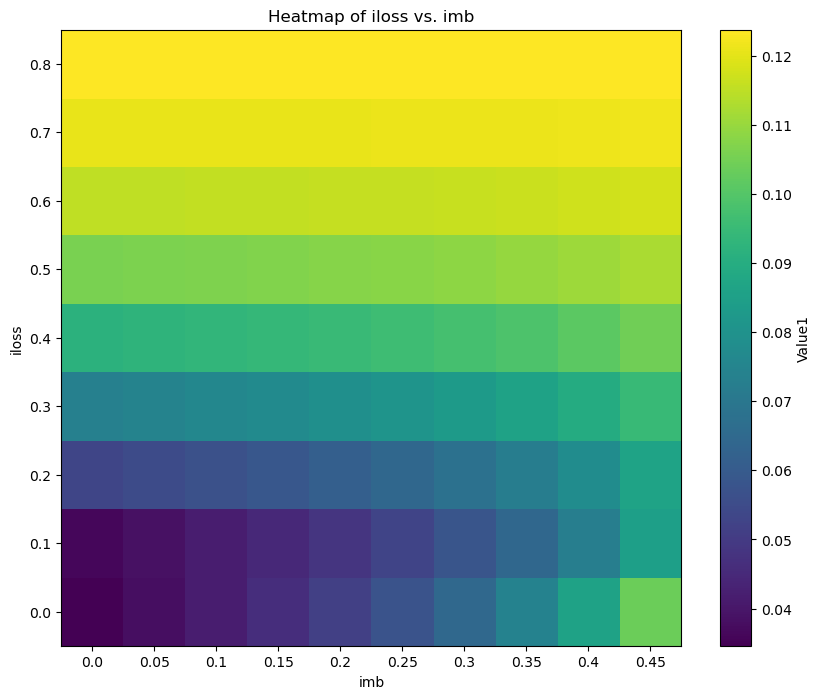

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.034613,0.037853,0.041734,0.046140,0.051483,0.057588,0.064789,0.073970,0.085894,0.103813
0.1,0.036302,0.038753,0.041634,0.044734,0.048538,0.052864,0.057989,0.064370,0.072672,0.085064
0.2,0.053079,0.054813,0.056784,0.058915,0.061538,0.064420,0.067988,0.072304,0.077936,0.086266
0.3,0.073540,0.074633,0.075883,0.077307,0.078916,0.080813,0.083080,0.085845,0.089456,0.094825
0.4,0.091914,0.092534,0.093268,0.094059,0.094976,0.096085,0.097392,0.099032,0.101188,0.104416
0.5,0.105926,0.106217,0.106549,0.106948,0.107401,0.107961,0.108633,0.109490,0.110641,0.112405
0.6,0.115317,0.115405,0.115525,0.115667,0.115852,0.116079,0.116363,0.116737,0.117264,0.118102
0.7,0.120858,0.120854,0.120865,0.120891,0.120931,0.120995,0.121082,0.121207,0.121395,0.121719
0.8,0.123657,0.123631,0.123611,0.123599,0.123593,0.123596,0.123607,0.123631,0.123675,0.123763


In [35]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'FldzhyanBellHalf_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

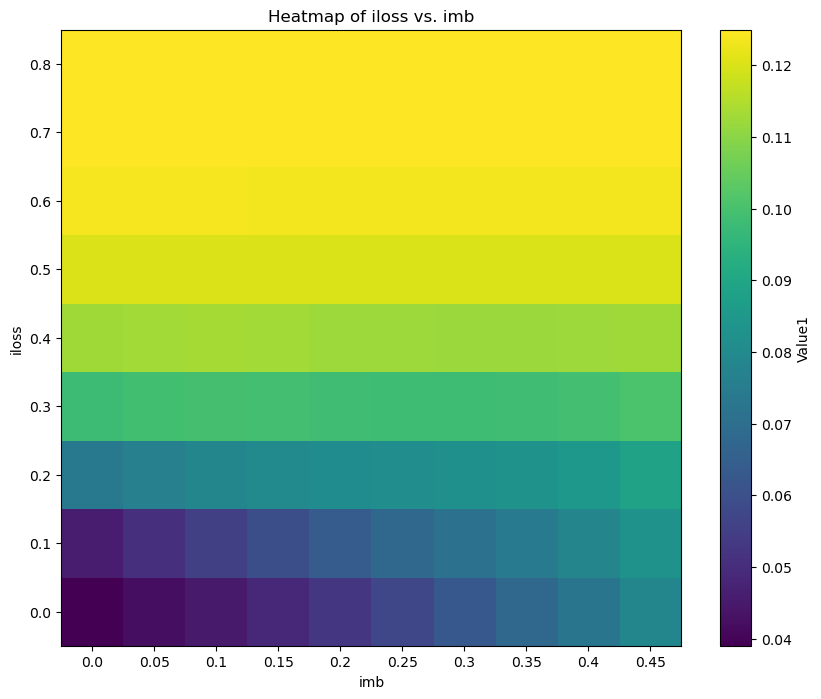

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.039011,0.042353,0.045107,0.048452,0.052565,0.057430,0.062813,0.067700,0.072507,0.078376
0.1,0.046033,0.050501,0.055182,0.059710,0.064069,0.067959,0.071415,0.074584,0.078076,0.083232
0.2,0.073900,0.076299,0.078462,0.079978,0.080729,0.081290,0.082034,0.083172,0.085000,0.088477
0.3,0.097803,0.098846,0.099474,0.099268,0.098748,0.098438,0.098339,0.098551,0.099145,0.100576
0.4,0.112745,0.113157,0.113271,0.112903,0.112495,0.112224,0.112085,0.112089,0.112290,0.112852
0.5,0.120399,0.120543,0.120547,0.120365,0.120187,0.120062,0.119994,0.119981,0.120046,0.120244
0.6,0.123639,0.123680,0.123677,0.123618,0.123562,0.123523,0.123500,0.123495,0.123513,0.123570
0.7,0.124719,0.124728,0.124727,0.124714,0.124703,0.124694,0.124690,0.124688,0.124692,0.124704
0.8,0.124970,0.124971,0.124971,0.124969,0.124968,0.124967,0.124967,0.124966,0.124967,0.124968


In [36]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'NEUROPULS_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

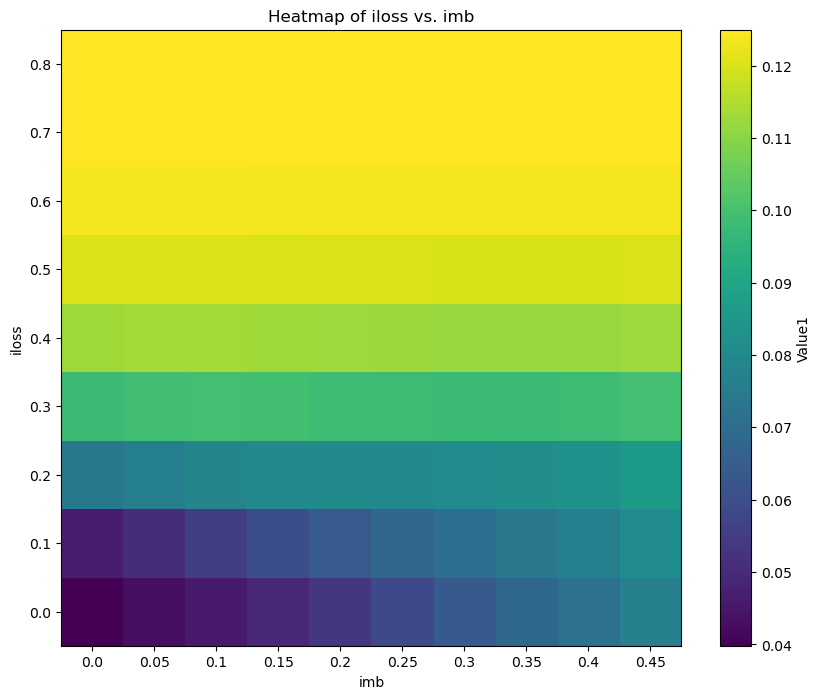

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.039817,0.043299,0.046015,0.049181,0.053683,0.058725,0.063826,0.068172,0.071670,0.076832
0.1,0.046485,0.051004,0.055593,0.060118,0.064363,0.067931,0.070757,0.073437,0.076568,0.081389
0.2,0.074136,0.076554,0.078678,0.079956,0.080310,0.080635,0.081160,0.081847,0.083156,0.086189
0.3,0.097916,0.099004,0.099566,0.099134,0.098484,0.098068,0.097895,0.097941,0.098284,0.099371
0.4,0.112794,0.113228,0.113284,0.112809,0.112366,0.112053,0.111879,0.111823,0.111937,0.112368
0.5,0.120417,0.120567,0.120551,0.120332,0.120138,0.119998,0.119917,0.119885,0.119920,0.120075
0.6,0.123644,0.123687,0.123677,0.123608,0.123547,0.123504,0.123477,0.123467,0.123476,0.123521
0.7,0.124720,0.124729,0.124727,0.124712,0.124700,0.124690,0.124685,0.124683,0.124684,0.124694
0.8,0.124970,0.124971,0.124971,0.124969,0.124968,0.124967,0.124966,0.124966,0.124966,0.124967


In [37]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'NEUROPULSBell_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

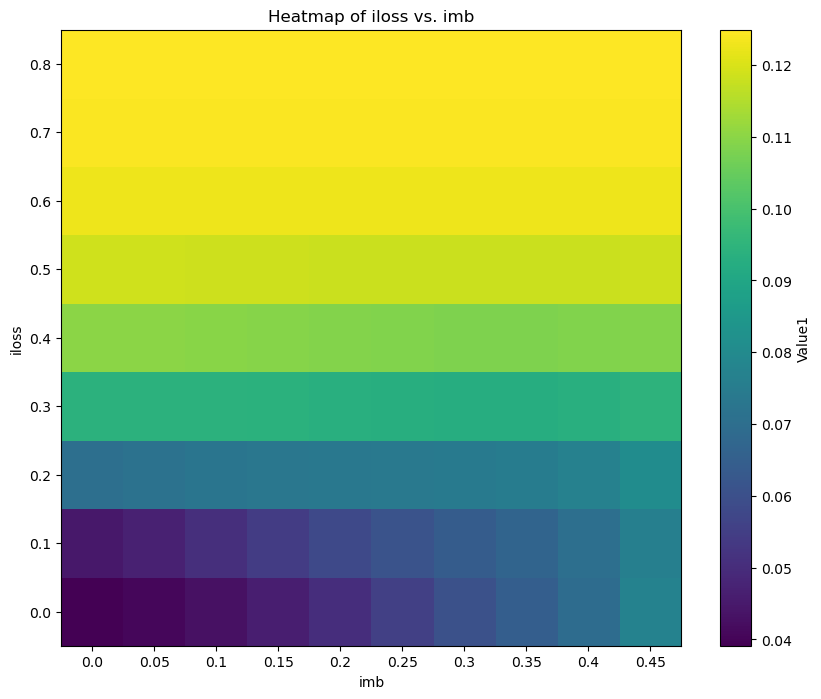

imb,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45
iloss,,,,,,,,,,
0.0,0.039127,0.040640,0.043144,0.046298,0.050403,0.055367,0.060375,0.064794,0.069384,0.077094
0.1,0.044601,0.047166,0.050816,0.054468,0.058008,0.061211,0.064097,0.066771,0.070432,0.076316
0.2,0.070417,0.071330,0.072549,0.073248,0.073453,0.073687,0.074166,0.075109,0.076886,0.080711
0.3,0.094093,0.094252,0.094272,0.093813,0.093237,0.092801,0.092585,0.092663,0.093172,0.094587
0.4,0.109966,0.109905,0.109683,0.109261,0.108851,0.108536,0.108350,0.108330,0.108512,0.109118
0.5,0.118771,0.118687,0.118527,0.118318,0.118138,0.118009,0.117928,0.117918,0.118003,0.118259
0.6,0.122879,0.122823,0.122757,0.122687,0.122632,0.122592,0.122572,0.122574,0.122608,0.122704
0.7,0.124450,0.124432,0.124415,0.124400,0.124388,0.124381,0.124378,0.124381,0.124392,0.124420
0.8,0.124911,0.124908,0.124906,0.124905,0.124904,0.124903,0.124903,0.124904,0.124906,0.124911


In [41]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_model = 'NEUROPULSBell2_Arct'

ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
ave_devstd_df = pd.DataFrame(ave_devstd_run)
ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')

# Plot the heatmap using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, aspect='auto', cmap='viridis', origin='lower')
plt.colorbar(label='Value1')
plt.title('Heatmap of iloss vs. imb')
plt.xlabel('imb')
plt.ylabel('iloss')
# Set ticks for x and y axis
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.show()

heatmap_data

# iloss = 0 Clements and Fldzhyan compare the Bell version

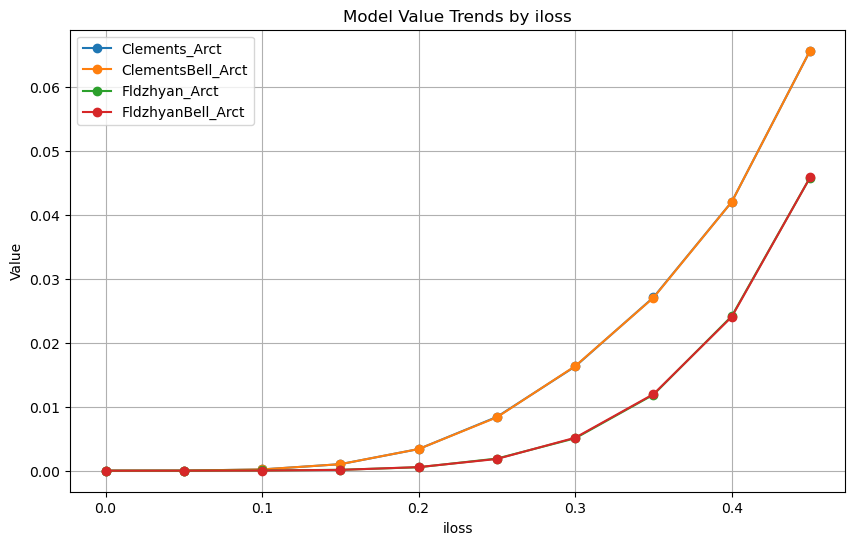

In [35]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_models_select = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct']
# name_model = 'NEUROPULSBell2_Arct'

plt.figure(figsize=(10, 6))
heatmap_data_xmodel = []
data_filterd = []
for name_model in name_models_select:
    ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
    ave_devstd_df = pd.DataFrame(ave_devstd_run)
    ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
    ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
    heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')
    data_filterd = heatmap_data.loc[0.0]
    plt.plot(data_filterd.index, data_filterd, marker='o', label=name_model)

plt.title('Model Value Trends by iloss')
plt.xlabel('iloss')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# iloss = 0 Bell version compare Half and NEUROPULS

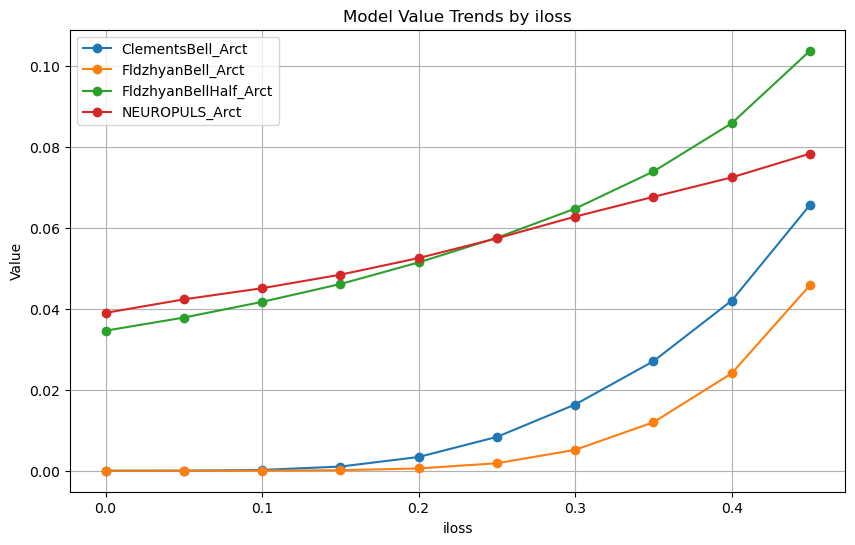

In [37]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_models_select = ['ClementsBell_Arct', 'FldzhyanBell_Arct',
                      'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct']

plt.figure(figsize=(10, 6))
heatmap_data_xmodel = []
data_filterd = []
for name_model in name_models_select:
    ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
    ave_devstd_df = pd.DataFrame(ave_devstd_run)
    ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
    ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
    heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')
    data_filterd = heatmap_data.loc[0.0]
    plt.plot(data_filterd.index, data_filterd, marker='o', label=name_model)

plt.title('Model Value Trends by iloss')
plt.xlabel('iloss')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# iloss = 0 Half and all NEUROPULS

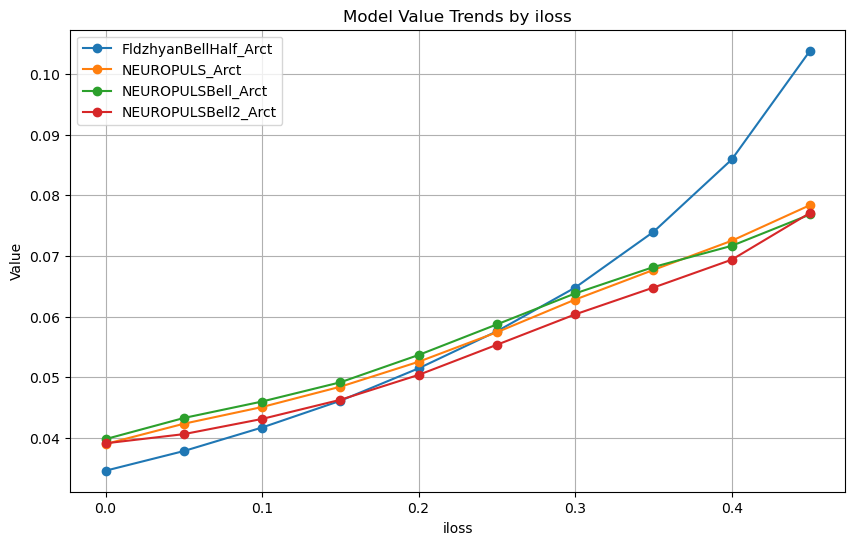

In [39]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_models_select = ['FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']

plt.figure(figsize=(10, 6))
heatmap_data_xmodel = []
data_filterd = []
for name_model in name_models_select:
    ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
    ave_devstd_df = pd.DataFrame(ave_devstd_run)
    ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
    ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
    heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')
    data_filterd = heatmap_data.loc[0.0]
    plt.plot(data_filterd.index, data_filterd, marker='o', label=name_model)

plt.title('Model Value Trends by iloss')
plt.xlabel('iloss')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# i = 0.1 Clements and Fldzhyan
Nothinng will change form loss 0.1 or 0.8. Fldzhyan always perform better :)

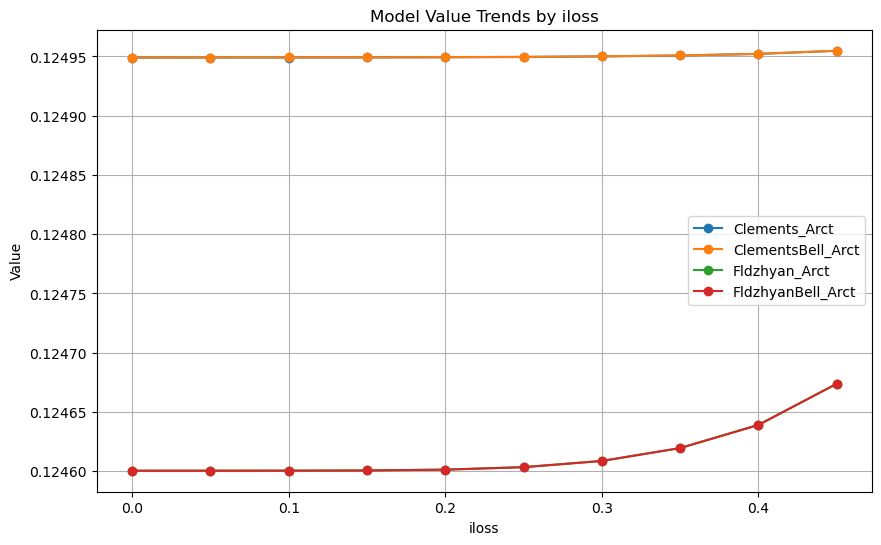

In [42]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_models_select = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',]

plt.figure(figsize=(10, 6))
heatmap_data_xmodel = []
data_filterd = []
for name_model in name_models_select:
    ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
    ave_devstd_df = pd.DataFrame(ave_devstd_run)
    ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
    ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
    heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')
    data_filterd = heatmap_data.loc[0.1]
    plt.plot(data_filterd.index, data_filterd, marker='o', label=name_model)

plt.title('Model Value Trends by iloss')
plt.xlabel('iloss')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# iloss = 0.4 intresting Fldzhyan and Half
The Half perform better for imb low :)

Clements perform almost all the time worst compare the other architectures

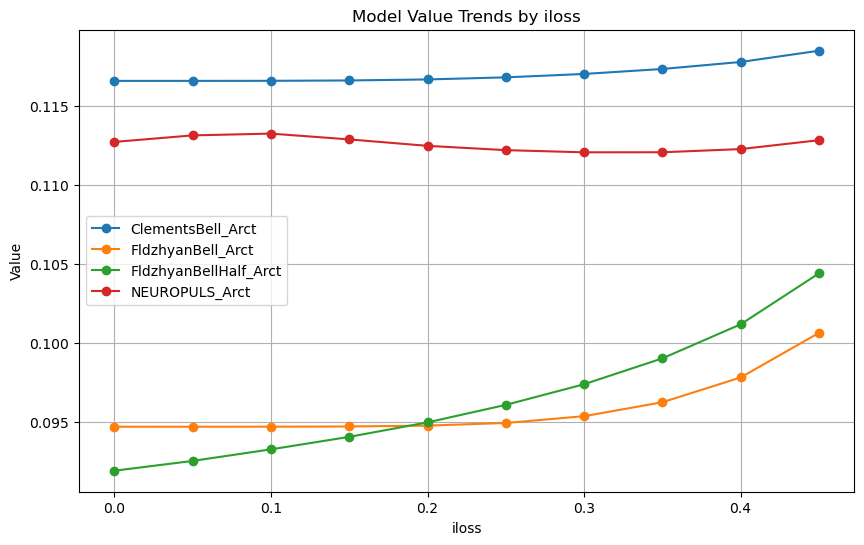

In [48]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_models_select = ['ClementsBell_Arct', 'FldzhyanBell_Arct',
                      'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct']

plt.figure(figsize=(10, 6))
heatmap_data_xmodel = []
data_filterd = []
for name_model in name_models_select:
    ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
    ave_devstd_df = pd.DataFrame(ave_devstd_run)
    ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
    ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
    heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')
    data_filterd = heatmap_data.loc[0.4]
    plt.plot(data_filterd.index, data_filterd, marker='o', label=name_model)

plt.title('Model Value Trends by iloss')
plt.xlabel('iloss')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# iloss = 0.1 Half and NEUROPULS
MAke sense the Half perform better because the cossing introduce also them the losses so has multiple lossing
layers.

Sill at high imb the NEUROPULS perform better :)

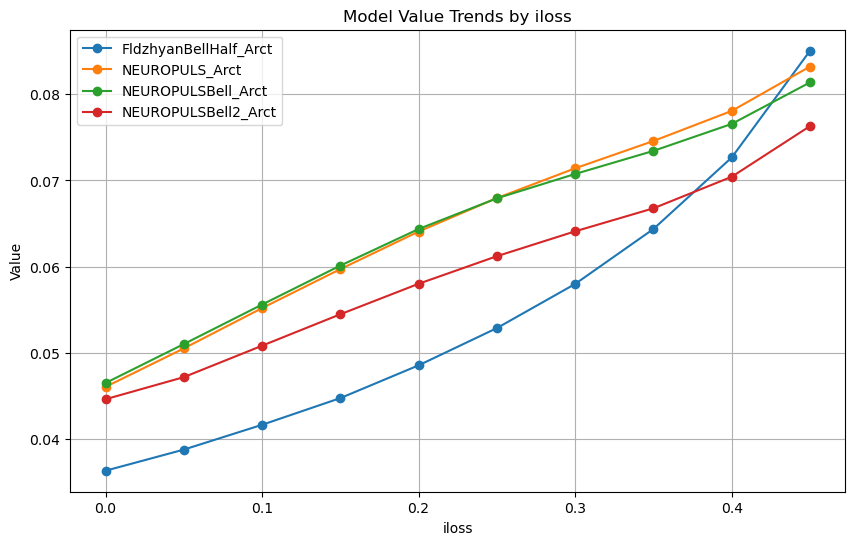

In [53]:
directory_run = 'outdata/20240525_run_IMPORTANT'
name_models = ['Clements_Arct', 'ClementsBell_Arct', 'Fldzhyan_Arct', 'FldzhyanBell_Arct',
               'FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']
name_models_select = ['FldzhyanBellHalf_Arct', 'NEUROPULS_Arct', 'NEUROPULSBell_Arct', 'NEUROPULSBell2_Arct']

plt.figure(figsize=(10, 6))
heatmap_data_xmodel = []
data_filterd = []
for name_model in name_models_select:
    ave_devstd_run = np.load(directory_run+'/20240525_run_ave_dev_save.npy', allow_pickle=True)
    ave_devstd_df = pd.DataFrame(ave_devstd_run)
    ave_devstd_df[['iloss', 'imb']] = ave_devstd_df['simulation'].apply(lambda x: pd.Series(extract_values(x)))
    ave_devstd_filtered_model_df = ave_devstd_df[ave_devstd_df['model'] == name_model]
    heatmap_data = ave_devstd_filtered_model_df.pivot_table(index='iloss', columns='imb', values='average')
    data_filterd = heatmap_data.loc[0.1]
    plt.plot(data_filterd.index, data_filterd, marker='o', label=name_model)

plt.title('Model Value Trends by iloss')
plt.xlabel('iloss')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()